In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


# AI & ML Internship — Task 4
## Feature Encoding & Scaling

### Objective:
- Identify categorical and numerical features
- Apply label encoding and one-hot encoding
- Scale numerical features
- Compare dataset readiness before and after scaling
- Save the preprocessed dataset


In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Preprocessing tools
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Display settings
pd.set_option("display.max_columns", None)


In [4]:
# Load Adult Income dataset
df = pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Check missing values
df.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Drop rows with missing values (small percentage)
df.dropna(inplace=True)

print("Shape after missing value handling:", df.shape)


Shape after missing value handling: (45222, 15)


In [9]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Remove target from categorical features
cat_cols.remove("income")

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Numerical columns: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [10]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0
educational-num,45222.0,10.118460,2.552881,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.00,40.0,45.0,99.0


In [11]:
df[num_cols].skew()


age                 0.532816
fnlwgt              1.447516
educational-num    -0.310621
capital-gain       11.789002
capital-loss        4.516304
hours-per-week      0.340545
dtype: float64

In [12]:
(df[num_cols] == 0).sum()


age                    0
fnlwgt                 0
educational-num        0
capital-gain       41432
capital-loss       43082
hours-per-week         0
dtype: int64

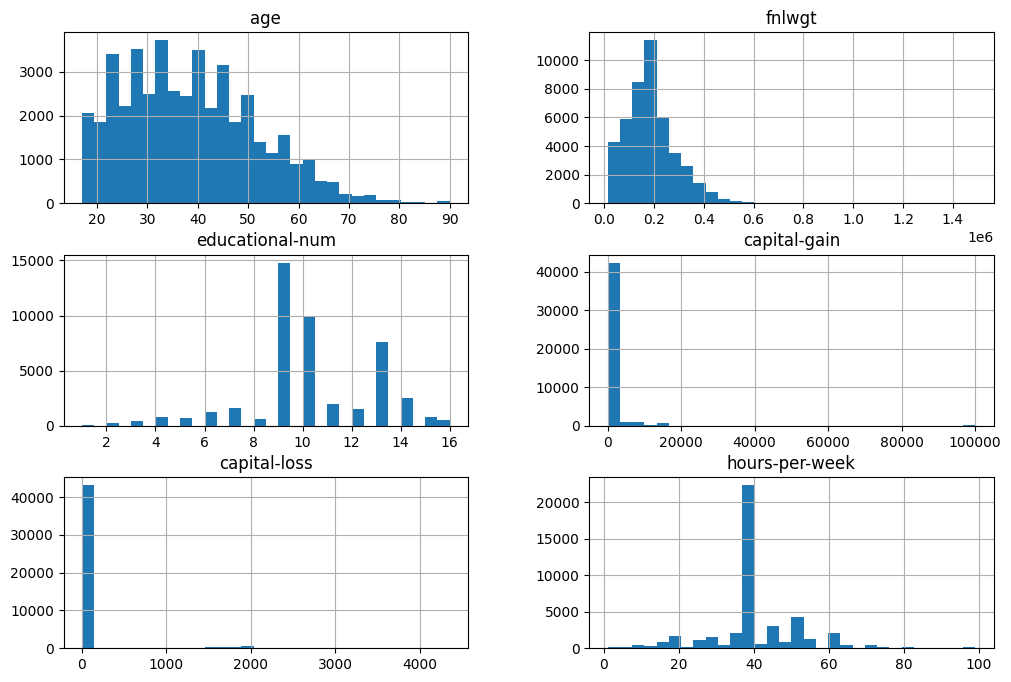

In [13]:
import matplotlib.pyplot as plt 
df[num_cols].hist(figsize=(12,8), bins=30)
plt.show()


In [14]:
for col in cat_cols:
    print(col, ":", df[col].nunique())


workclass : 7
education : 16
marital-status : 7
occupation : 14
relationship : 6
race : 5
gender : 2
native-country : 41


### Feature Engineering Decisions

- age → mildly skewed, bounded → StandardScaler
- fnlwgt → large magnitude → StandardScaler
- educational-num → ordinal, already encoded → keep raw
- capital-gain → extreme skew, many zeros → log1p transform
- capital-loss → extreme skew, many zeros → log1p transform
- hours-per-week → bounded numeric → StandardScaler


In [15]:
# Encode target variable (binary)
le = LabelEncoder()
df["income"] = le.fit_transform(df["income"])

df["income"].value_counts()


income
0    34014
1    11208
Name: count, dtype: int64

In [16]:
# Apply log1p to handle extreme skew and zero inflation
df["capital-gain"] = np.log1p(df["capital-gain"])
df["capital-loss"] = np.log1p(df["capital-loss"])


In [17]:
# Features chosen for scaling based on data analysis
scale_cols = ["age", "fnlwgt", "hours-per-week"]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

df[scale_cols].head()


,age,fnlwgt,hours-per-week
0,-1.024983,0.350889,-0.078120
1,-0.041455,-0.945878,0.754701
2,-0.798015,1.393592,-0.078120
3,0.412481,-0.278420,-0.078120
5,-0.344079,0.084802,-0.910942


In [18]:
# Apply One-Hot Encoding for nominal categorical features
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)


Shape after encoding: (45222, 97)


In [21]:
# Convert boolean columns to integers
bool_cols = df_encoded.select_dtypes(include="bool").columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [22]:
# Check for missing values
df_encoded.isnull().sum().sum()


np.int64(0)

In [23]:
# Final preview
df_encoded.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,0.350889,7,0.000000,0.0,-0.078120,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.041455,-0.945878,9,0.000000,0.0,0.754701,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.798015,1.393592,12,0.000000,0.0,-0.078120,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.412481,-0.278420,10,8.947546,0.0,-0.078120,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,-0.344079,0.084802,6,0.000000,0.0,-0.910942,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
# Save the final preprocessed dataset
df_encoded.to_csv("adult_income_preprocessed.csv", index=False)

print("Preprocessed dataset saved successfully.")


Preprocessed dataset saved successfully.
